### <center>Univariate/Multivariate Gaussian Distributions & Their Properties</center>


### <center>Univariate Normal Distributions</center>

The normal distribution (Gaussain Distribution) is defined by two parameters: mean $ \mu $, which is the expected value of the distribution and standard deviation $ \sigma $, which corresponds to the expected squared deviation from the mean. Mean, $ \mu $ controls the Gaussian's center position and the standard deviation controls the shape of the distribution. The square of the standard deviation is referred to as the variance $ \sigma^{2} $. The entire distribution is denoted as $\N(\mu,\sigma^{2}) $.
Given the mean and variance, one can calculate the probability distribution function of nomral distributions with a normalised Gaussian function for a value $x$, the density is:

$$
P(x|\mu,\sigma^{2}) = \frac{1} {\sqrt{2\pi\sigma^{2} }}^{(-\frac{x - \mu^{2}}{2\sigma^{2}})}
$$

We'll call this distriution "univariate" as it consists of one **random** variable.


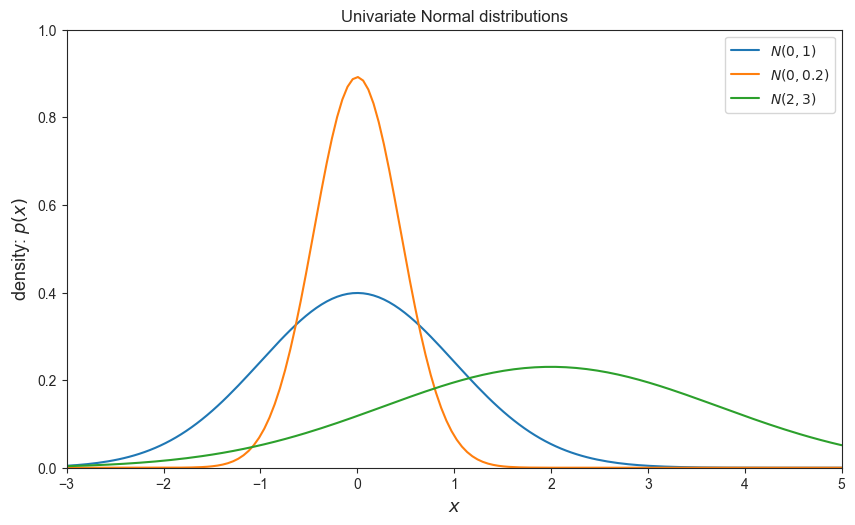

In [1]:
# ruff: noqa: I001, PLR0402
import numpy as np
from numpy import random, mean, sqrt, std, log, pi, exp
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams["figure.figsize"] = (10, 6)
# mpl.rcParams['figure.fontsize'] = 13
# plt.style.use(["seaborn-notebook", "../presentation.mplstyle"])  # jupyter version
sns.set_style("ticks")

# with plt.style.context('presentation'):
#     plt.plot([1, 2, 3, 4])
# Context Manager version


def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return (1.0 / sqrt(2 * pi * variance)) * exp(-((x - mean) ** 2) / (2 * variance))


# plotting different univariate Normals
x = np.linspace(-3, 5, num=150)

# NOTE: Create a func to make this plt code less verbose & cleaner.

plt.plot(x, univariate_normal(x, mean=0, variance=1), label="$N(0, 1)$")
plt.plot(x, univariate_normal(x, mean=0, variance=0.2), label="$N(0, 0.2)$")
plt.plot(x, univariate_normal(x, mean=2, variance=3), label="$N(2, 3)$")
plt.xlabel("$x$", fontsize=13)
plt.ylabel("density: $p(x)$", fontsize=13)
plt.title("Univariate Normal distributions")
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig = plt.subplots_adjust(bottom=0.15)
# plt.savefig("univariate_normal_distributions.png")

### <center>Multivariate Normal Distribution</center>

The multivariate normal distribution is a multidimensional generalisation of the one dimensional normal distribution. It represents the distribution of a multivariate random variable, that is made up of multiple random variables which can be correlated with each other.

Like the univariate normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $ \mu $. which is expected value of the distribution and the variance-covariance matrix $ \sum $, which measures how two random variables depend on each other and how they change together.

We denote the covariance between variables $X$ and $Y$ as $$Cov(X,Y)$$

The multivariate normal with dimensionality $d$ has a joint probability density given by:

$$
P(\mathbf{x} \mid \mu,\Sigma) = \frac{1}{\sqrt{2(\pi)^{d} \lvert \Sigma \rvert}} ^{\left(- \frac{1}{2} (\mathbf{x} - \mu)^{T} \Sigma^{-1} (\mathbf{x} - \mu)\right)}\\
$$
> where: 
> - $\mathbf{x}$ is a random vector of size $d$
> - $\mu$ is $d$ $\times$ $1$ mean vector
> - $\Sigma$ is the (symmetric and positive definite) covariance matrix of size $d$ $\times$ $d$
> - $\lvert \Sigma \rvert$ is the determinant. We denote this multivariate normal distribution as N($\mu, \Sigma$).


In [3]:
# np.linalg.eigvals(bivariate_covariance)
# array([1.8, 0.2])

# We see that this covariance matrix is indeed positive definite (ref: The Spectral Theorem for Matrices)

Plotting a multivariate normal distribution for both cases:


C:\Users\eo\AppData\Local\Temp\ipykernel_32640\704734635.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pdf[i, j] = multivariate_normal(


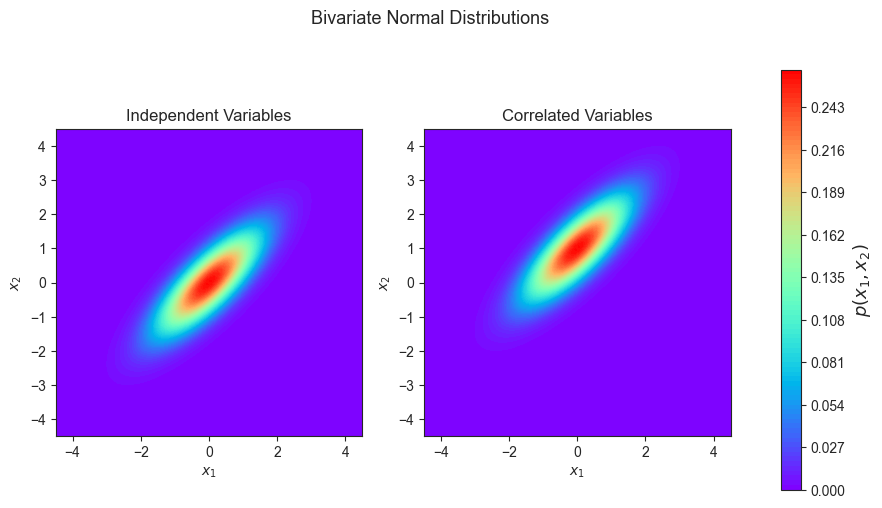

In [4]:
# using the function above: multivariate_normal()


def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (
        1.0
        / (sqrt((2 * pi) ** d * np.linalg.det(covariance)))
        * exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2)
    )


def gen_surface(mean, covariance, d):
    """Helper function to generate density surface"""
    nb_of_x = 100  # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s)  # generate the grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # fill the cost matrix for ea combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i, j] = multivariate_normal(
                np.matrix([[x1[i, j]], [x2[i, j]]]), d, mean, covariance
            )
    return x1, x2, pdf  # x1, x2, pdf(x1, x2)


# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
d = 2  # number of dimensions

# plot independent Normals
bivariate_mean = np.matrix([[0.0], [0.0]])  # Mean
bivariate_covariance = np.matrix([[1.0, 0.8], [0.8, 1.0]])  # Covariance

x1, x2, p = gen_surface(bivariate_mean, bivariate_covariance, d)

# plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap="rainbow")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.axis([-4.5, 4.5, -4.5, 4.5])
ax1.set_aspect("equal")
ax1.set_title("Independent Variables")

# plot of correlated Normals
bivariate_mean = np.matrix([[0.0], [1.0]])  # Mean
bivariate_covariance = np.matrix([[1.0, 0.8], [0.8, 1.0]])  # Covariance
x1, x2, p = gen_surface(bivariate_mean, bivariate_covariance, d)

# plot bivariate distribution for correlated Normals
con = ax2.contourf(x1, x2, p, 100, cmap="rainbow")
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.axis([-4.5, 4.5, -4.5, 4.5])
ax2.set_aspect("equal")
ax2.set_title("Correlated Variables")

# add colorbar and title
fig.subplots_adjust(right=0.8, hspace=0.2)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel("$p(x_1, x_2)$", fontsize=13)
plt.suptitle("Bivariate Normal Distributions", fontsize=13, y=0.95)
plt.savefig("Bivariate_normal_distributions")

### <center>Affine transformation of Univariate Normal Distribution</center>

Suppose $X \sim N(\mu, \sigma^{2})$ and $a, b \in \mathbb{R}$ with $a \neq 0$. If we define an affine transformation $Y = g(X) = aX+b$, then $Y \sim \N(a\mu + b, a^{2}\sigma^{2})$, meaning that a linear combination of independent random variables are normal.

For example, if

$$
X \sim N(1, 2)
$$

$$
Y = X + 3 \Rightarrow Y \sim N(4, 2)
$$

$$
Y = 2X + 3 \Rightarrow Y \sim N(5, 8)
$$

Proving this with the transformation method,

$$
\begin{split}
F_{Y}(y) = P(Y \leq y) &= P(aX + b \leq y)\\
&= P(X \leq \frac{Y-b}{a})\\
&= \int_{-\infty}^{\frac{y-b}{a}}\frac{1}{\sqrt{2\pi \sigma^{2}}} exp \left(- \frac{(x - \mu)^{2}}{2\sigma^{2}} \right) dx
\end{split}
$$

---

$$
\begin{split}
f_{Y}(y) &= \frac{d}{dy} \int_{-\infty}^{\frac{y-b}{a}}\frac{1}{\sqrt{2\pi \sigma^{2}}} exp \left(- \frac{(x - \mu)^{2}}{2\sigma^{2}} \right) dx\\
&= \frac{1}{\sqrt{2\pi \sigma^{2}}} exp \left(- \frac{\left(\left(\frac{y-b}{a} \right) - \mu\right)^{2}}{2\sigma^{2}} \right) \left(\frac{d}{dy}\frac{y-b}{a} \right)\\
&= \frac{1}{a\sigma \sqrt{2\pi}} exp \left(- \frac{\left(y-(a\mu +b)\right)^{2}}{2a^{2}\sigma^{2}} \right)\\
\end{split}
$$

and then simply so $Y =  \sim N(a\mu + b, a^{2}\sigma^{2})$.


### <center>Affine transformation of Multivariate Normal Functions</center>

It is possible to transform a multivariate normal distribution into a new normal distribution, using an affine transformation. Specifically, if $X$ is normally distributed and $Y = LX + u$ with $L$ being a linear transformation and $u$ being a vector, then $y$ is also normally distributed with mean $\mu_{Y} = u + L \mu_{X}$ and covariance matrix $\Sigma_{Y} = L \Sigma_{X} L^{T}$

$$
\begin{split}
Y \sim N(\mu_{Y}, \Sigma_{Y}) \quad\quad X \sim N(\mu_{X}, \Sigma_{X}) N(\mu_{Y}, \Sigma_{Y}) = N(u + L\mu_{X}, L\Sigma_{X}L^T) = LN(\mu_{X}, L\Sigma_{X}) + u
\end{split}
$$


This can be proven as follows:

$$
\mu_{Y} = \mathbb{E}[Y] = \mathbb{E}[LX + u] = \mathbb{E}[LX] + u = L\mu_{X} + u
$$

$$
\begin{split}
\Sigma_{Y} & = \mathbb{E}[(Y-\mu_{Y})(Y-\mu_{Y})^\top] \\
           & = \mathbb{E}[(LX+u - L\mu_{X}-u)(LX+u - L\mu_{X}-u)^\top] \\
           & = \mathbb{E}[(L(X-\mu_{X})) (L(X-\mu_{X}))^\top] \\
           & = \mathbb{E}[L(X-\mu_{X}) (X-\mu_{X})^\top L^\top] \\
           & = L\mathbb{E}[(X-\mu_{X})(X-\mu_{X})^\top]L^\top \\
           & = L\Sigma_{X}L^\top
\end{split}
$$


### <center>Sampling from a Multivariate Normal Distribution</center>

Previous formula helps us to sample from any multivariate Gaussian distribution.
In order to do this, sample $X$ from $N(0, I*{d})$ where mean is the vector $\mu = 0$ and the variance-covariance matrix is the identity matrix $\Sigma*{X} = I\_{d}$ (standard multivariate normal distribution). Sampling from this distribution is easier because each variable in $X$ is independent from all other variables, we can just sample each variable separately.

Its then possible to sample Y from $N(\mu_{Y}, \Sigma{Y})$ by sampling X and applying the affine transformation on said samples. This transform is $Y = LX + u$ where we know the covariance of Y is $\Sigma_{Y} = L \Sigma{X} L^{T}$. Since $\Sigma_{X} = I_{d}$, we can write $\Sigma_{Y} = L \Sigma_{X} L^{T}$ = $L I_{d} L^{T} = L L^{T}$. $L$ can be found by a technique called Cholesky decomposition. The vector $u$ is then $\mu_{Y}$ since $\mu_{X} = 0$ ($u = \mu_{Y} - L \mu_{X}$).


Try sampling 50 samples from:

$$
Y
\sim
N\left(
\begin{bmatrix} 0 \\
1
\end{bmatrix},
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

The sampling is done by the following code and the samples are plotted as red dots on the probability density surface below.


In [5]:
# Sample from:
d = 2  # number of random samples
mean = np.matrix([[0.0], [1.0]])
covariance = np.matrix([[1, 0.8], [0.8, 1]])

# create L
L = np.linalg.cholesky(covariance)
print(L)

[[1.  0. ]
 [0.8 0.6]]


In [12]:
n = 50  # sampels to draw
X = np.random.normal(size=(d, n))
# print(X)
# print(f"-------------------------------------------")
# print(np.shape(X))
print(f"{X}\n{"----"*30}\n shape: {np.shape(X)}")

[[-0.06857922  0.87792696 -1.08493122 -0.22410469  0.30922281  0.63064254
  -0.17567756  1.02474578 -0.42585659 -1.09673499 -0.18856539 -0.18771913
  -1.09866794  2.13904745  1.09293528  0.08304234  0.15220208  0.90229632
   0.18310587  0.55183108  0.33504012 -0.25519173  1.02263854 -0.58859767
  -0.08762619  0.4252976   0.78713805  0.5448393  -0.63278989  0.3079399
   1.09844772  1.92686873  0.28637201  0.02322514  0.5057096  -0.17896682
   0.59927312 -0.76537886  0.7988108   0.81126539  0.80491069  1.21900501
  -0.77782627 -0.89048537  0.35309526  0.47938804  1.0676061  -0.47219863
   1.86887587  1.22159725]
 [-0.88001245  0.6451075  -1.45257095  0.56170753 -0.38418949  1.2853853
   0.43665361 -0.45911297  1.39187411  1.04170943 -0.18830614  1.74812661
  -0.23184132 -1.04329107  1.27896451  1.67690986 -0.42305377 -1.84248878
  -0.59726248  0.80690905  0.54133416 -2.44945265 -0.08556719 -0.61483931
   0.42405681 -0.94514799  0.9352553   0.50434335 -0.08314094  0.13259026
   1.29369645

C:\Users\eo\AppData\Local\Temp\ipykernel_2264\3400300307.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pdf[i, j] = multivariate_normal(


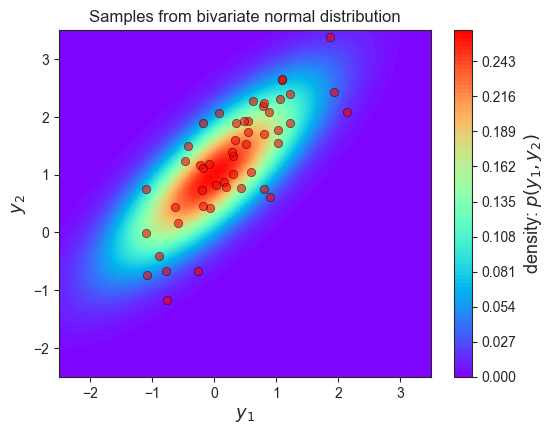

In [13]:
Y = L.dot(X) + mean

# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))

# Plot bivariate distribution
x1, x2, p = gen_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 100, cmap="rainbow")

# Plot samples
ax.plot(Y[0, :], Y[1, :], "ro", alpha=0.6, markeredgecolor="k", markeredgewidth=0.5)
ax.set_xlabel("$y_1$", fontsize=13)
ax.set_ylabel("$y_2$", fontsize=13)
ax.axis([-2.5, 3.5, -2.5, 3.5])
ax.set_aspect("auto")
ax.set_title("Samples from bivariate normal distribution")
cbar = plt.colorbar(con)
cbar.ax.set_ylabel("density: $p(y_1, y_2)$", fontsize=13)
plt.savefig("sampling_from_multivariate_normal_distribution.png", format="png")

## <center>Marginal Normal Distributions</center>

If both $\mathbf{x}$ and $\mathbf{y}$ are jointly normal random vectors defined as:

$$
\begin{bmatrix}
\mathbf{x} \\
\mathbf{y}
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
\mu_{\mathbf{x}} \\
\mu_{\mathbf{y}}
\end{bmatrix},
\begin{bmatrix}
A & C \\
C^T & B
\end{bmatrix}
\right)
= \mathcal{N}(\mu, \Sigma)
, \qquad
\Sigma^{-1} = \Lambda =
\begin{bmatrix}
\tilde{A} & \tilde{C} \\
\tilde{C}^T & \tilde{B}
\end{bmatrix}
$$


In [16]:
import numpy as np


d = 2
mean = np.matrix([[0.0], [1.0]])
cov = np.matrix([[1, 0.8], [0.8, 1]])

# Getting mean values from the vectors
mu_x = mean[0, 0]
mu_y = mean[1, 0]

# get the blocks (single values in this case) from the cov matrix
A = cov[0, 0]
B = cov[1, 1]
C = cov[0, 1]  # C transpose in this case

A marginal distribution is the distribution of a subset of random variables from the original distribution. It represents the probabilities or densities of the variables in the subset without reference to the other values in the original distribution.

In our case of the 2D multivariate normal the marginal distibutions are the univariate distributions of each component $\mathbf{x}$ and $\mathbf{y}$ seperately. They are defined as:

$$
\begin{split}
p(\mathbf{x}) & = \mathcal{N}(\mu_{\mathbf{x}}, A) \\
p(\mathbf{y}) & = \mathcal{N}(\mu_{\mathbf{y}}, B)
\end{split}
$$


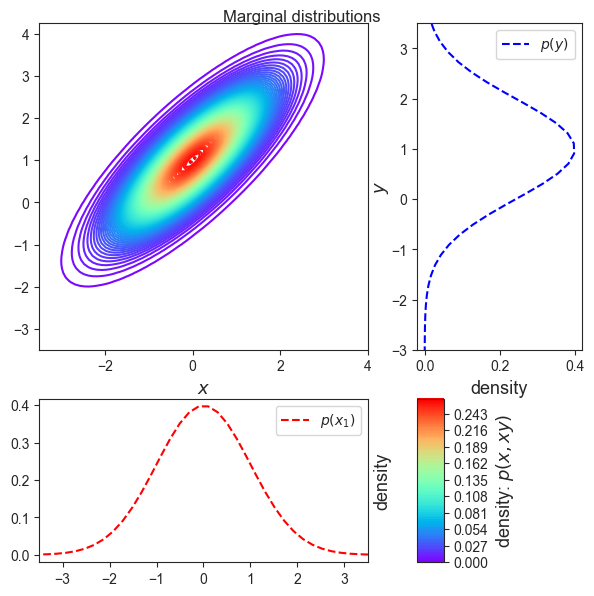

In [ ]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable


# plotting bivariate distribution
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace =0., hspace = 0.)
plt.suptitle("Marginal distributions", y=0.90)

# plot surface top left
ax1 = plt.subplot(gs[0])
x, y, p = gen_surface(mean, cov, d)

con = ax1.contour(x, y, p, 100, cmap="rainbow")
ax1.set_xlabel("$x$", fontsize=13)
ax1.set_ylabel("$y$", fontsize=13)
ax1.yaxis.set_label_position("right")
ax1.axis([-3.5, 4, -3.5, 4.25])  # type: ignore

# plot y
ax2 = plt.subplot(gs[1])
y = np.linspace(-10, 10, num=100)
py = univariate_normal(y, mu_y, A)
# plot univariate distribution
ax2.plot(py, y, "b--", label=f"$p(y)$")
ax2.legend(loc=0)
ax2.set_xlabel("density", fontsize=13)
ax2.set_ylim(-3.0, 3.5)

# plot x
ax3 = plt.subplot(gs[2])
x = np.linspace(-10, 10, num=100)
px = univariate_normal(x, mu_x, B)
# Plot univariate distribution
ax3.plot(x, px, "r--", label=f"$p(x_1)$")
ax3.legend(loc=0)
ax3.set_ylabel("density", fontsize=13)
ax3.yaxis.set_label_position("right")
ax3.set_xlim(-3.5, 3.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("left", size="20%", pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel("density: $p(x, xy)$", fontsize=13)
plt.savefig("marginal_normal_distributions")

In [ ]:
# ", label=f"$p(y)$")
# ax2.legend(loc=0)
# ax2.set_xlabel("density", fontsize=13)
# ax2.set_ylim(-1.5, 3.5)

# # plot x
# ax3 = plt.subplot(gs[2])
# x = np.linspace(-5, 5, num=100)
# px = univariate_normal(x, mu_x, B)
# # Plot univariate distribution
# ax3.plot(x, px, "r--", label=f"$p(x_1)$")
# ax3.legend(loc=0)
# ax3.set_ylabel("density", fontsize=13)
# ax3.yaxis.set_label_position("right")
# ax3.set_xlim(-2.5, 2.5)

# # Clear axis 4 and plot colarbar in its place
# ax4 = plt.subplot(gs[3])
# ax4.set_visible(False)
# divider = make_axes_locatable(ax4)
# cax = divider.append_axes("left", size="20%", pad=0.05)
# cbar = fig.colorbar(con, cax=cax)
# cbar.ax.set_ylabel("density: $p(x, xy)$", fontsize=13)
# plt.savefig("marginal_normal_distributions")

## <center>What are the Different types of Covariance Matrices?</center>

Couple of examples of covariance structures that could be specified for multivariate Gaussian distributions.


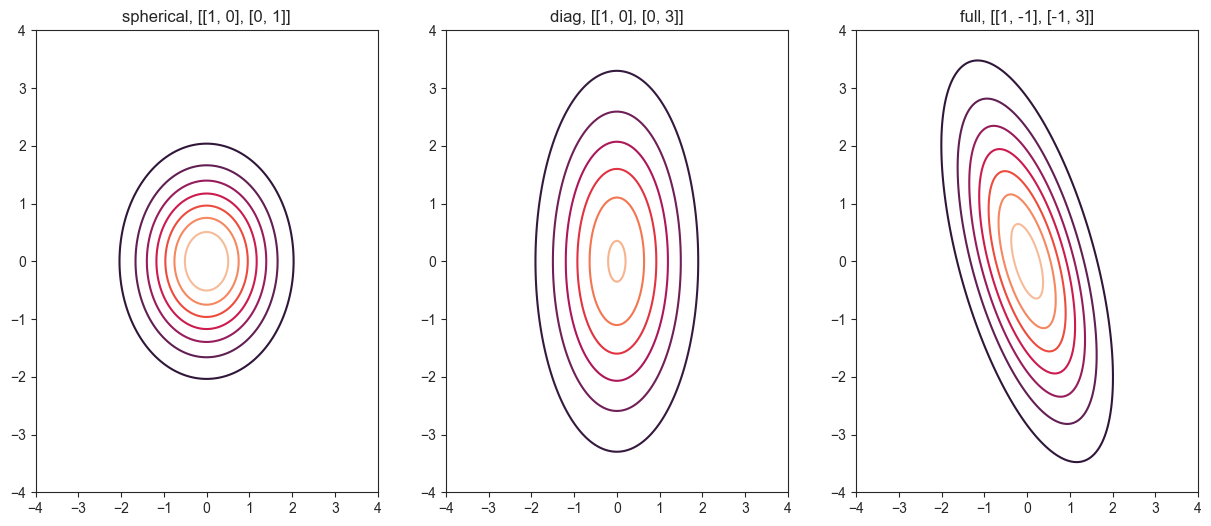

In [ ]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-4:4:0.01, -4:4:0.01]
position = np.empty(x.shape + (2,))
position[:, :, 0] = x
position[:, :, 1] = y

# different values for the covariance matrix
covariances = [[[1, 0], [0, 1]], [[1, 0], [0, 3]], [[1, -1], [-1, 3]]]
titles = ["spherical", "diag", "full"]

plt.figure(figsize=(15, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    z = multivariate_normal([0, 0], covariances[i]).pdf(position)
    plt.contour(x, y, z)
    plt.title("{}, {}".format(titles[i], covariances[i]))
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])

plt.show()

One way to view a gaussian distribution in two dimensions is via a contour plot (see above). The coloring represents the regions intensity, or how high it was in probability.

In the plot above, the center area that has dark red color is the region of highest probability, while the blue area corresponds to a low probability.

The first plot is refered to as a Spherical Gaussian, since the probability distribution has spherical (circular) symmetry. The covariance matrix is a diagonal covariance with equal elements along the diagonal. By specifying a diagonal covariance, what we're seeing is that there's no correlation between our two random variables, because the off-diagonal correlations takes the value of 0. You can simply interpret it as there is no linear relationship exists between variables. However, note that this does not necessarily mean that they are independent. Furthermore, by having equal values of the variances along the diagonal, we end up with a circular shape to the distribution because we are saying that the spread along each one of these two dimensions is exactly the same.

In contrast, the middle plot's covariance matrix is also a diagonal one, but we can see that if we were to specify different variances along the diagonal, then the spread in each of these dimensions is different and so what we end up with are these axis-aligned ellipses. This is refered to as a Diagonal Gaussian.

Finally, we have the full Gaussian distribution. A full covariance matrix allows for correlation between the two random variables (non-zero off-diagonal value) we can provide these non-axis aligned ellipses. So in this example that we're showing here, these two variables are negatively correlated, meaning if one variable is high, it's more likely that the other value is low.


## <center>Maximum Likelihood Estimation for Univariate Gaussian Distributions</center>

Given the assumption that observations from the sample are i.i.d., the likelihood function can be written as:

$$
\begin{split}
L(\mu, \sigma^{2}; x_{1}, x_{2}, \ldots, x_{n}) &= \prod_{i=1}^{n} f_{X}(x_{i} ; \mu , \sigma^{2})\\
&= \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^{2}}} exp \left(- \frac{(x_{i} - \mu)^{2}}{2\sigma^{2}} \right)\\
&= \left(2\pi \sigma^{2} \right)^{-n/2} exp \left(-\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}(x_{i} - \mu)^{2} \right)\\
\end{split}
$$

The log-likelihood function is

$$
l(\mu, \sigma^{2}; x_{1}, x_{2}, \ldots , x_{n}) = \frac{-n}{2}ln(2\pi) -\frac{n}{2} ln(\sigma^{2})-\frac{1}{2\sigma^{2}}\sum_{i=1}^{n}(x_{i} - \mu)^{2}
$$

If we take first-order partial derivatives of the log-likelihood function with respect to the mean $\mu$ and variance $\sigma^{2}$ and set the equations zero and solve them, we will have the maximum likelihood estimators of the mean and the variance, which are:

$$
\mu_{MLE} = \frac{1}{n} \sum_{i=1}^{n} x_{i}
$$

and

$$
\sigma_{MLE}^{2} = \frac{1}{n} \sum_{i=1}^{n} \left(x_{i} - \mu_{MLE}\right)^{2}
$$

respectively. Thus, the estimator $\mu_{MLE}$ is equal to the sample mean and the estimator $\sigma_{MLE}^{2}$ is equal to the unadjusted sample variance.

### <center>Maximum Likelihood Estimation for Multivariate Gaussian Distribution</center>

The maximum likelihood estimators of the mean $\mu$ and the variance $\Sigma$ for multivariate normal distribution are found similarly and are as follows:

$$
\mu_{MLE} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_{i}
$$

and

$$
\Sigma_{MLE} = \frac{1}{n} \sum_{i=1}^{n} \left(\mathbf{x}_{i} - \mu_{MLE}\right) \left(\mathbf{x}_{i} - \mu_{MLE}\right)^{T}
$$


---
---
